### Oklahoma purchase credit card transactions

The Office of Management and Enterprise Services in the State of Oklahoma has made its [purchase credit card transactions](https://catalog.data.gov/dataset/purchase-card-pcard-fiscal-year-2014) available. This dataset contains information on purchases made through the purchase card programs administered by the state and higher education institutions. 

In this assignment, you will complete the following tasks.

- Create new features and conduct exploratory data analysis. Your exploratory data analysis should be as exhaustive as possible. 
- Each feature or discussion is a new lead. Structure your EDA for different leads with sub-sections. Each sub-section will cover the following:
    - Lead: Write what you are going to do in two to three sentences.
    - Analysis: your EDA
    - Conclusion: What is the business insight? How can this feature help prediction? Write a short conclusion in the end of each sub-section. 

-  Submit in the HTML format.  

# Name: Aston Yuetian Chen

In [1]:
#install.packages("plotly")

In [2]:
#install.packages("DataExplorer")

In [3]:
library(dplyr)
library(DataExplorer)
library(ggplot2)
library(plotly)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [4]:
ccard <- read.csv("/Users/aston/Desktop/CU2020Summer/HW1/purchase_credit_card.csv")

In [5]:
dim(ccard)
summary(ccard)
colnames(ccard)

[1] 442458     11

   Year.Month     Agency.Number  
 Min.   :201307   Min.   : 1000  
 1st Qu.:201309   1st Qu.: 1000  
 Median :201401   Median :47700  
 Mean   :201357   Mean   :42786  
 3rd Qu.:201404   3rd Qu.:76000  
 Max.   :201406   Max.   :98000  
                                 
                                Agency.Name    
 OKLAHOMA STATE UNIVERSITY            :115995  
 UNIVERSITY OF OKLAHOMA               : 76143  
 UNIV. OF OKLA. HEALTH SCIENCES CENTER: 58247  
 DEPARTMENT OF CORRECTIONS            : 22322  
 DEPARTMENT OF TOURISM AND RECREATION : 17232  
 DEPARTMENT OF TRANSPORTATION         : 15689  
 (Other)                              :136830  
               Cardholder.Last.Name Cardholder.First.Initial
 JOURNEY HOUSE TRAVEL INC: 10137    J      : 55031          
 UNIVERSITY AMERICAN     :  7219    G      : 42251          
 JOURNEY HOUSE TRAVEL    :  4693    D      : 38120          
 Heusel                  :  4212    M      : 35352          
 Hines                   :  3423    S  

[1] "Year.Month"                   "Agency.Number"               
 [3] "Agency.Name"                  "Cardholder.Last.Name"        
 [5] "Cardholder.First.Initial"     "Description"                 
 [7] "Amount"                       "Vendor"                      
 [9] "Transaction.Date"             "Posted.Date"                 
[11] "Merchant.Category.Code..MCC."

In [6]:
# Count of agencies
# Spent by agency
# Count by merchant.Category.Code
colnames(ccard)<-c('Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category')

In [7]:
nrow(ccard)
head(ccard)

[1] 442458

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
5,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER"
6,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT"


In [8]:
# Simple Bar Plot Count of agencies
stat_by_agency <- ccard %>% group_by(Agency_Name) %>%
    summarise(count = n(),
              amount = sum(Amount),
              mean = mean(Amount),
              min = min(Amount),
              max = max(Amount)
             ) %>%
    arrange(desc(amount)) %>% ungroup() 
head(stat_by_agency)

Agency_Name,count,amount,mean,min,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
OKLAHOMA STATE UNIVERSITY,115995,33778840,291.2094,-6266.53,27967.38
UNIVERSITY OF OKLAHOMA,76143,24886383,326.8374,-41740.00,114203.17
UNIV. OF OKLA. HEALTH SCIENCES CENTER,58247,24527325,421.0916,-7188.61,1903858.37
GRAND RIVER DAM AUTH.,10427,22213829,2130.4142,-9000.00,1089180.00
DEPARTMENT OF TRANSPORTATION,15689,14399262,917.7935,-34108.00,348053.75
DEPARTMENT OF CORRECTIONS,22322,13988872,626.6854,-20000.00,96190.38


In [9]:
# added percentage col and revised the name of the first col
stat_by_agency <- stat_by_agency %>%
    mutate(row = rep(1:nrow(stat_by_agency)),
          Agency_Name_ind = paste(row,Agency_Name,sep="_"),
          percent = amount/sum(amount)) %>%
    select(Agency_Name_ind,count, amount, percent,mean, min, max)

head(stat_by_agency)

Agency_Name_ind,count,amount,percent,mean,min,max
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1_OKLAHOMA STATE UNIVERSITY,115995,33778840,0.17963575,291.2094,-6266.53,27967.38
2_UNIVERSITY OF OKLAHOMA,76143,24886383,0.13234570,326.8374,-41740.00,114203.17
3_UNIV. OF OKLA. HEALTH SCIENCES CENTER,58247,24527325,0.13043623,421.0916,-7188.61,1903858.37
4_GRAND RIVER DAM AUTH.,10427,22213829,0.11813306,2130.4142,-9000.00,1089180.00
5_DEPARTMENT OF TRANSPORTATION,15689,14399262,0.07657522,917.7935,-34108.00,348053.75
6_DEPARTMENT OF CORRECTIONS,22322,13988872,0.07439277,626.6854,-20000.00,96190.38


In [10]:
library(repr)
options(repr.plot.width=20, repr.plot.height=8)

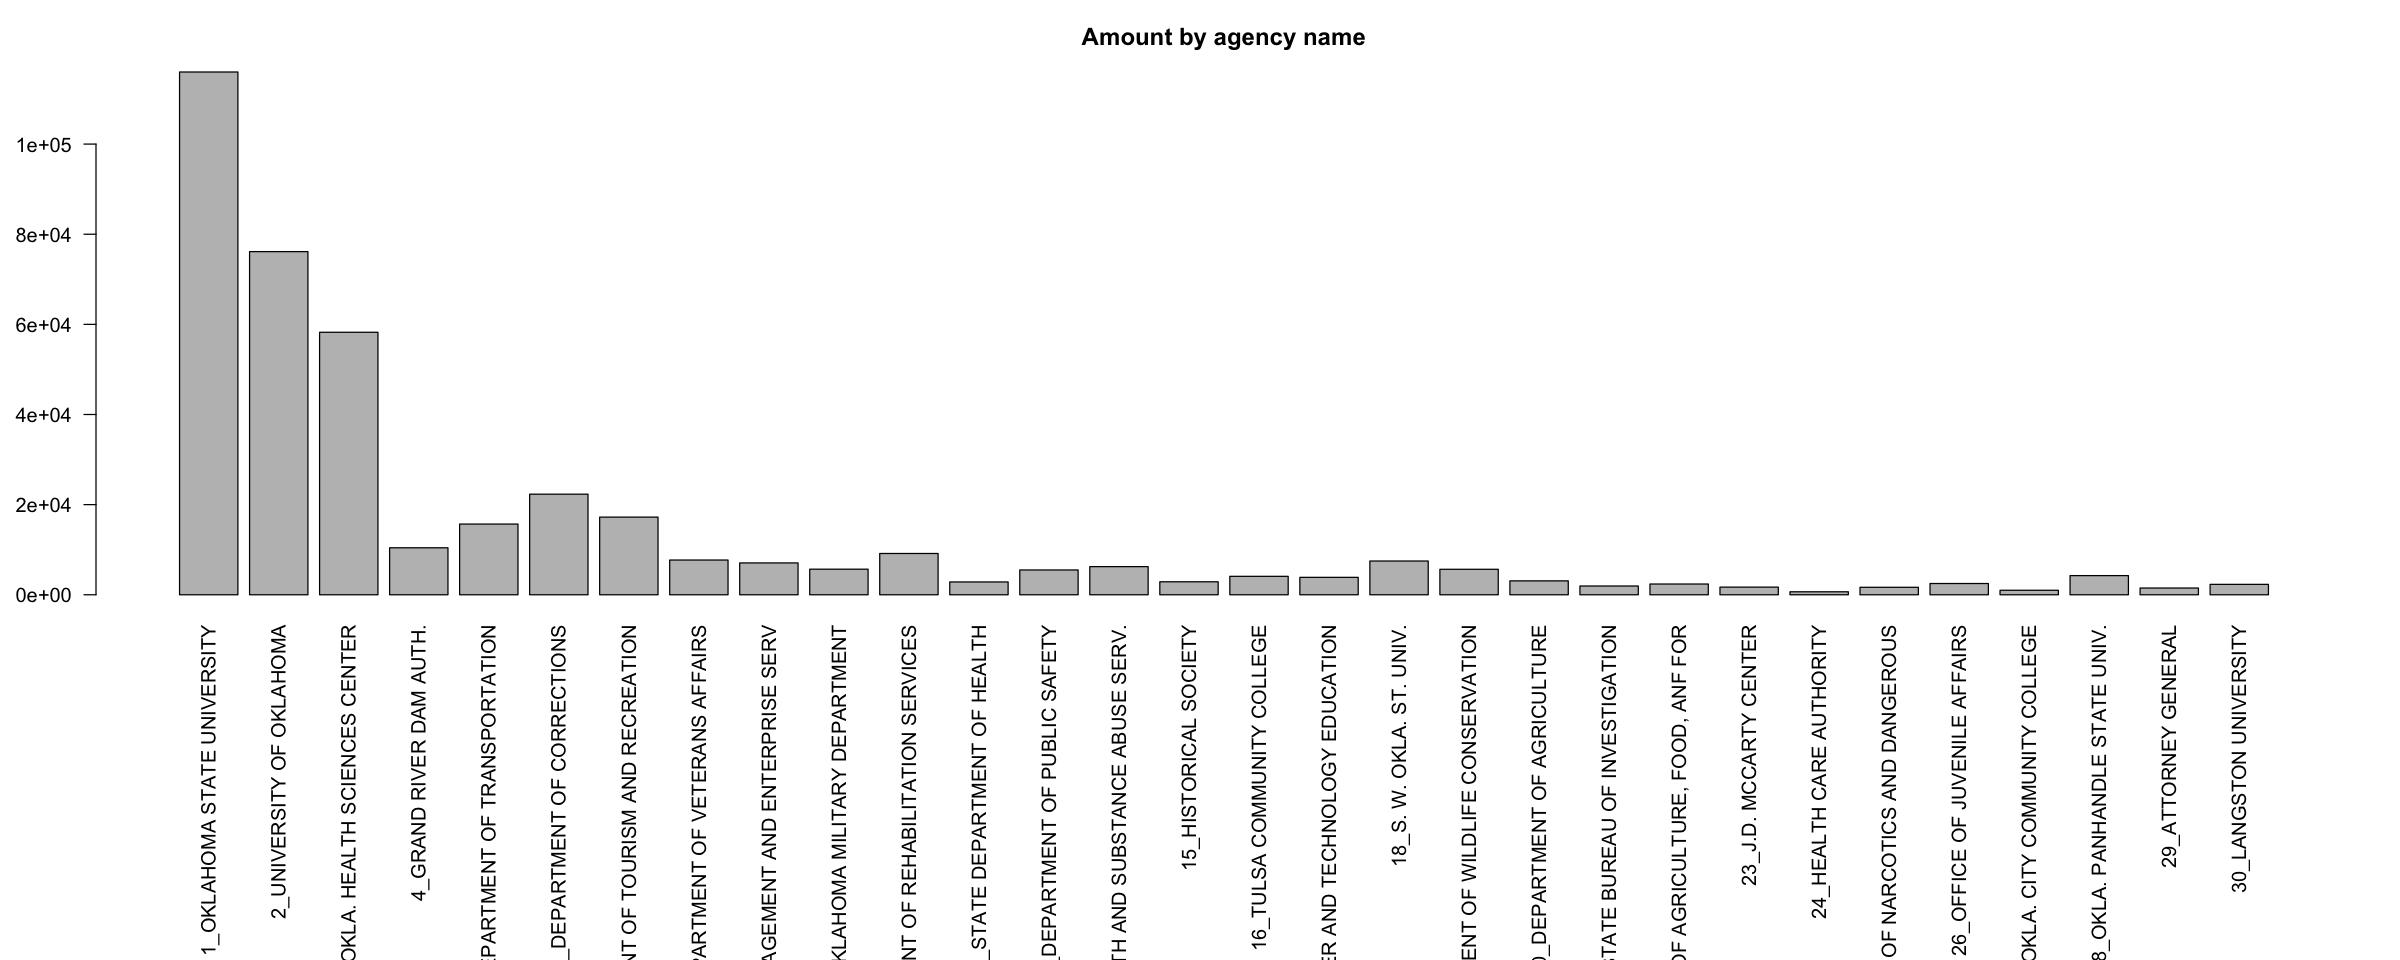

In [11]:
temp <-stat_by_agency[1:30,]
setwd("/Users/aston/Desktop/CU2020Summer/HW1/")
par(mar=c(15, 4, 3, 2))
barplot(temp$count, , names.arg=temp$Agency_Name_ind,
main="Amount by agency name",las=2)

# Overall Level Features
## Feature 1: maximum spending for the entire database. 
If any transaction goes over this amount, it might be an anomaly.
Business insight: the maximum number just develops an upperbound on the back of my head. If transaction goes over this number, it is very likely that it is a fraud. 

In [12]:
summary(ccard[,"Amount"])

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 -42863.0      30.9     104.9     425.0     345.0 1903858.4 

## Feature 2: mean spending/maximum spending is a metric that could be used.
If a transaction is over certaind standard deviation, say five standard deviations above this threshold, it could be a fraud.
Business insight: the average spending for the entire population account for less than 0.02% of the largest transaction. It solidifies the idea that the 1% of the population owns 90% of the wealth.

In [13]:
mean(ccard[,"Amount"])/max(ccard[,"Amount"])

[1] 0.0002232263

## Feature 3: mean of transaction time
Trying to find a representative statistic on time, though taking the average is not enough.
Due to the inability to find a Von Mises Distribution package on R, I will just use mean transaction time. The date is 2013-12-28, it shows that it is really meaningless in conveying important informatino for future modeling. 

In [14]:
a = as.Date(ccard$Transaction_Date,format="%m/%d/%Y %H:%M")
mean(a)

[1] "2013-12-28"

## Feature unrealized: fitting a von Mises distribution on the time.

### Define the von mises kernel density estimator
from scipy.optimize import curve_fit
import numpy as np
from matplotlib import pyplot as plt

def circular_von_mises_kde(x,mu,sigma):
    # Adjust data to take it to range of 2pi
    x = [(hr)*2*np.pi/24 for hr in x]
    mu*=2*np.pi/24
    sigma*=2*np.pi/24

    # Compute kappa for vm kde
    kappa = 1/sigma**2
    return np.exp((kappa)*np.cos((x-mu)))/(2*np.pi*i0(kappa))

# Groupby first and last name features
## Feature 4: the largest purchase per individual.
If one transaction is larger than the largest purchase, it could be an anomaly.
Business insight: by looking at just the first few rows, there is really no correlation between the number of transaction a person makes with the largest purchase a person made. This is useful in future modeling. 

In [15]:
groupby_person <- ccard %>% group_by(Cardholder_Last_Name, Cardholder_First_Initial)
f4 <- groupby_person  %>%  summarise(count = n(),
              amount = sum(Amount),
              mean = mean(Amount),
              min = min(Amount),
              max = max(Amount))
f4 <- f4[order(-f4$max),]
head(f4)

Cardholder_Last_Name,Cardholder_First_Initial,count,amount,mean,min,max
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
77000,7,6,3654238.4,609039.725,-0.08,1903858.4
Cardholder,e,1629,17856325.6,10961.526,-9000.00,1089180.0
Johnson,C,118,1477736.3,12523.189,-92.91,348053.8
81500,8,2,343239.2,171619.610,90.72,343148.5
MALLOY,J,255,414385.5,1625.041,-669.18,183367.9
Hunter,G,48,740702.6,15431.304,-3133.94,132000.0


## Feature failed: I assume that the more transactions an individual makes, the higher the maximum spending.
However, through examining one group with transaction number between 500 and 1000, and one group with transaction number 0 to 500. There is no correlation. Proven by correlation and plots. 

In [16]:
f41 <- f4  %>% filter(count > 500, count <1000)
f41 <- f41[order(f41$count),]
head(f41)

Cardholder_Last_Name,Cardholder_First_Initial,count,amount,mean,min,max
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ALINGER,D,502,59331.84,118.1909,-96.81,3190.48
KOUHDARI,P,506,93938.16,185.6485,-569.99,4422.29
Duren,C,512,177705.58,347.0812,-1042.00,4235.00
PAULEY,R,514,151317.24,294.3915,-345.14,9500.00
Doyle,A,521,119502.40,229.3712,-642.48,3565.50
Fine,L,522,124979.07,239.4235,-1282.40,1428.57


In [17]:
newmatrix1 <- f41[,c(3,7)]
cor(newmatrix1)

,count,max
count,1.00000000,0.09498685
max,0.09498685,1.00000000


In [18]:
library(ggplot2)
options(repr.plot.width=20, repr.plot.height=8)

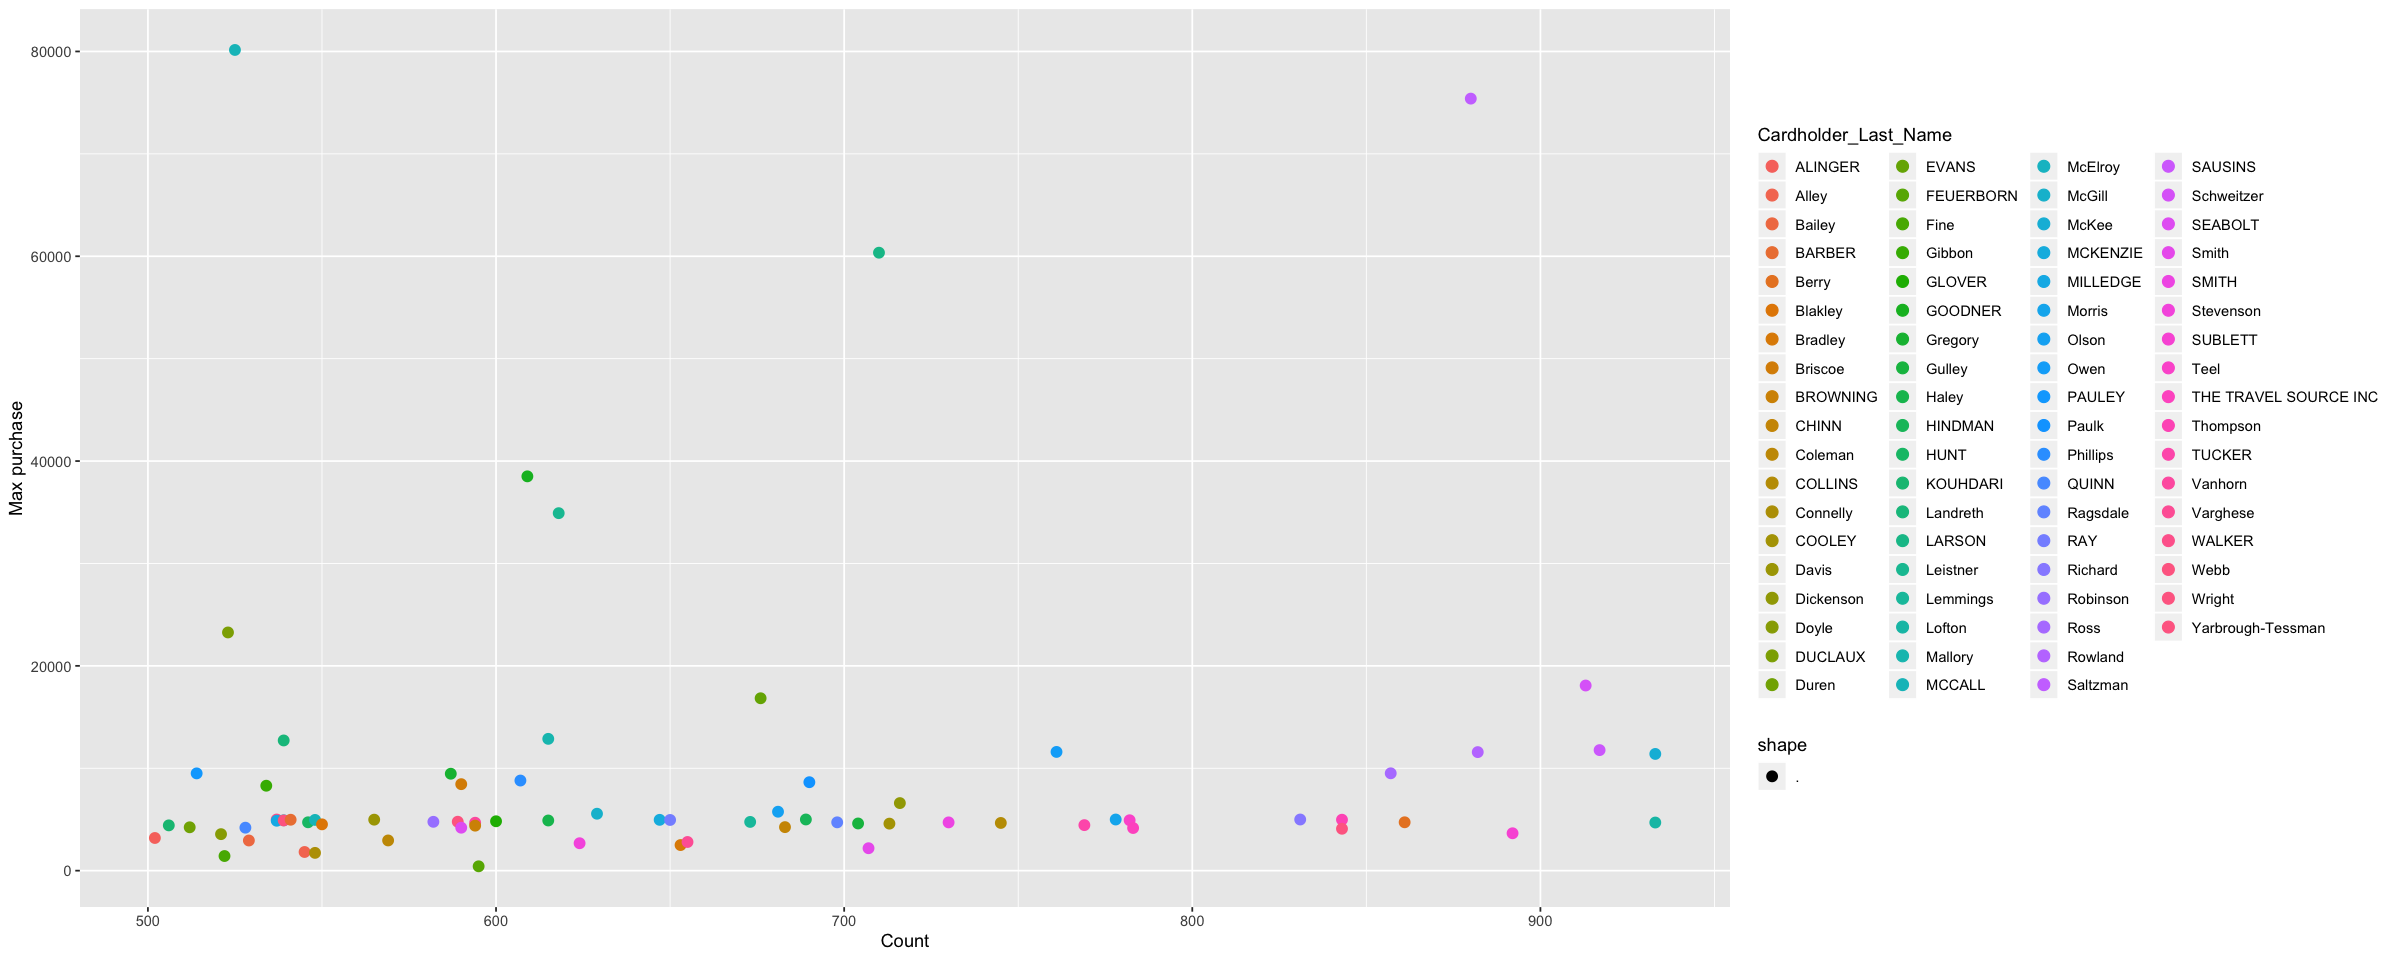

In [19]:
graph1 = qplot(count, max, data=f41, shape=".", color= Cardholder_Last_Name, size=I(3),
   xlab="Count", ylab="Max purchase")
graph1

## The above graph shows no correlation

In [20]:
f42 <- f4  %>% filter(count > 1, count <500)
f42 <- f42[order(f42$count),]
head(f42)

Cardholder_Last_Name,Cardholder_First_Initial,count,amount,mean,min,max
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
81500,8,2,343239.22,171619.610,90.72,343148.50
75000,7,2,59747.22,29873.610,29728.88,30018.34
Stinson,P,2,24727.59,12363.795,3036.39,21691.20
Young,G,2,4836.97,2418.485,351.97,4485.00
Stillwell,D,2,3861.95,1930.975,198.95,3663.00
Contardi,E,2,3192.70,1596.350,105.20,3087.50


In [21]:
newmatrix2 <- f42[,c(3,7)]
cor(newmatrix2)

,count,max
count,1.00000000,0.04601062
max,0.04601062,1.00000000


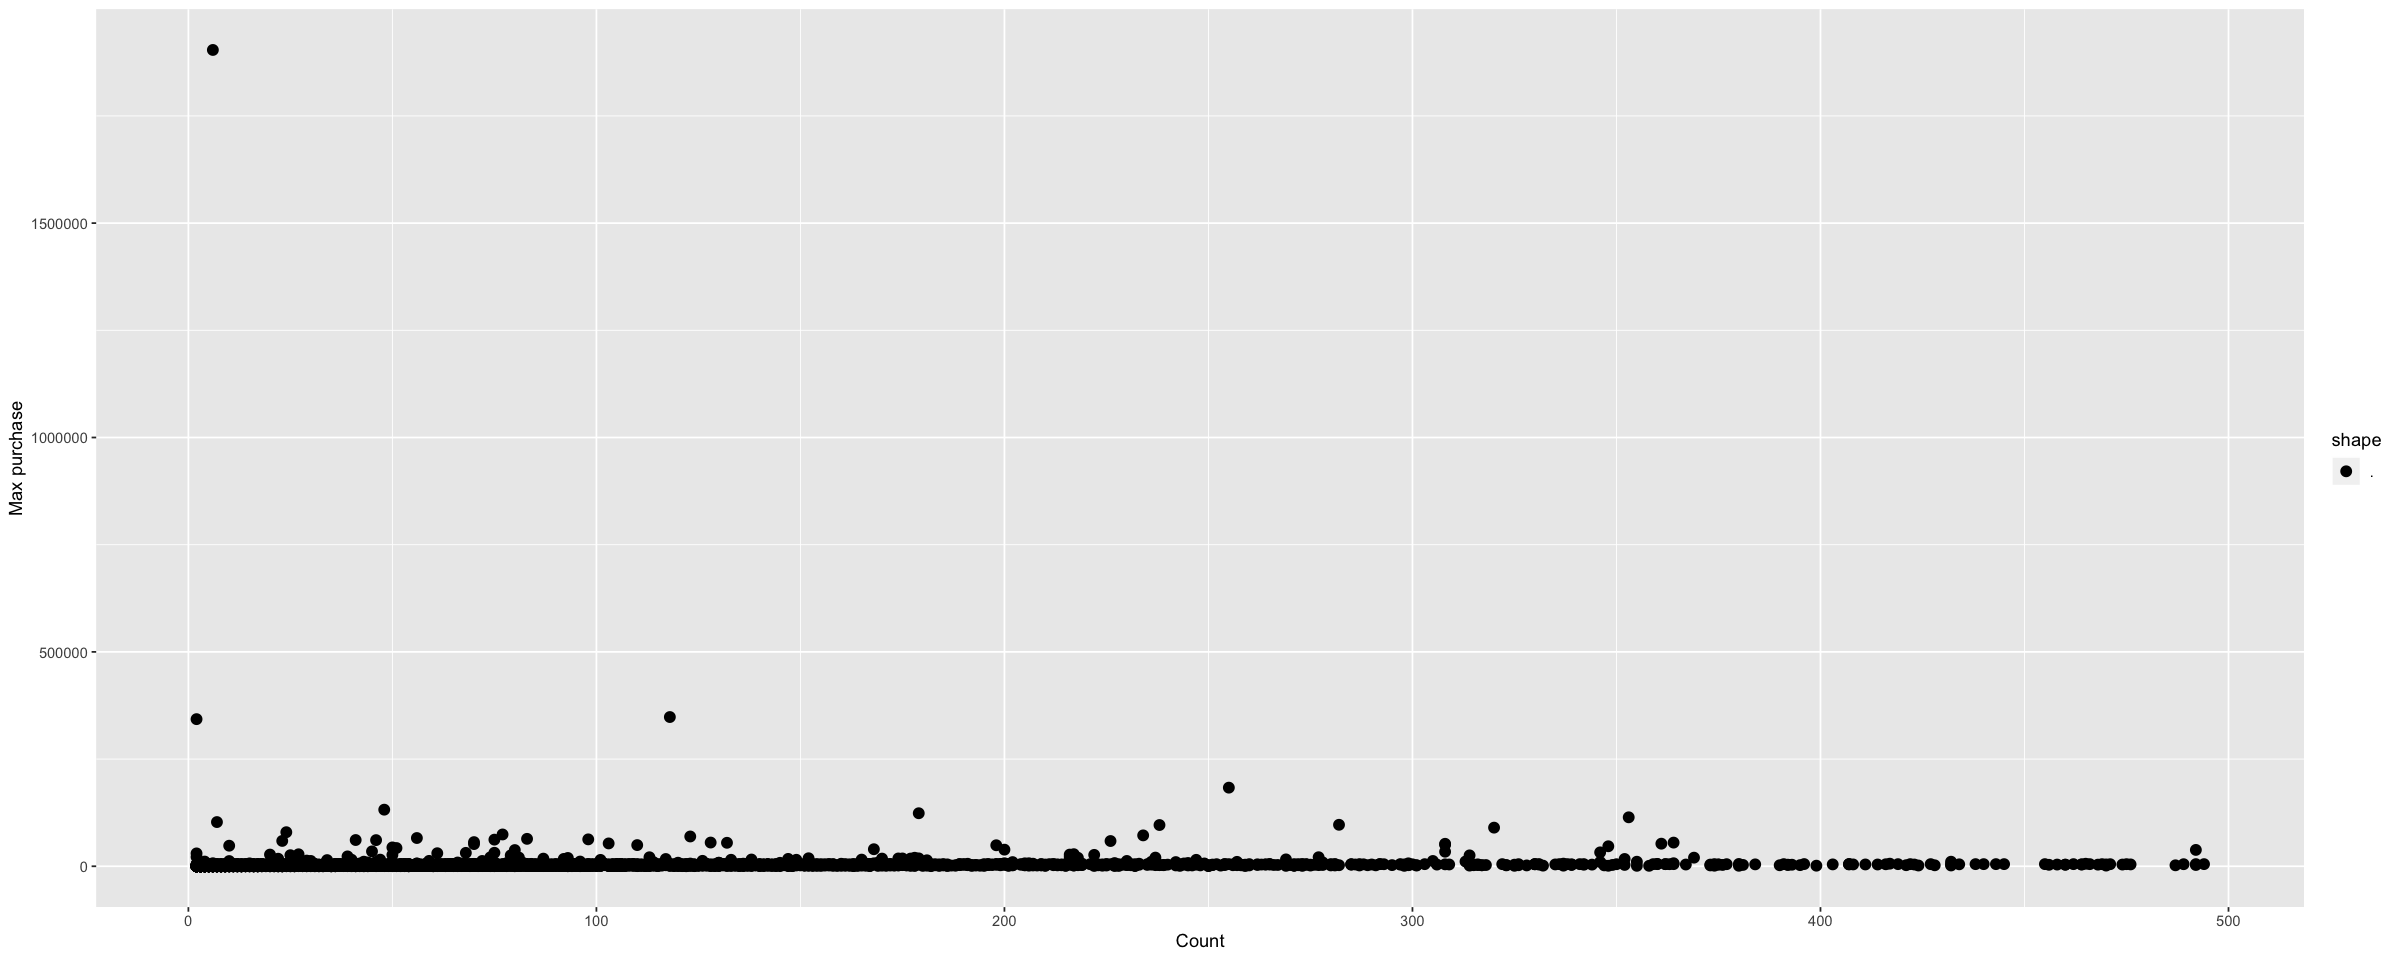

In [22]:
graph2 = qplot(count, max, data=f42, shape=".", size=I(3),
   xlab="Count", ylab="Max purchase")
graph2

## The above graph shows no correlation

## Feature 5: through correlation plot, individual's mean and max are highly correlated. From there I created a mean/max ratio. This ratio should be very stable for any individual overtime, if otherwise, this account may be susceptible to transaction risk. 
Buiness insight: if there is a sudden change in the ratio, it means either the mean changes a lot or the ratio changes a lot, both of which are abnormal. 

In [23]:
f5 <- groupby_person  %>%  summarise(count = n(),
              amount = sum(Amount),
              mean = mean(Amount),
              min = min(Amount),
              max = max(Amount))
f5 <- f5[order(-f5$count),]
head(f5)

Cardholder_Last_Name,Cardholder_First_Initial,count,amount,mean,min,max
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
JOURNEY HOUSE TRAVEL INC,G,10137,2930392.2,289.0788,-3136.06,16474.00
UNIVERSITY AMERICAN,G,7219,2461081.6,340.9172,-3708.03,34151.60
JOURNEY HOUSE TRAVEL,G,4693,1136362.4,242.1399,-1865.10,8286.30
Heusel,J,4212,1280687.8,304.0569,-2676.60,4998.00
Hines,G,3309,1676695.4,506.7076,-1774.30,4999.35
Bowers,R,2448,412113.2,168.3469,-810.00,3855.60


In [24]:
f5cor = f5[,c(3,4,5,6,7)]
cor(f5cor)

,count,amount,mean,min,max
count,1.000000000,0.3782463,-0.002617498,-0.206757010,0.07972897
amount,0.378246271,1.0000000,0.204168346,-0.241000195,0.63509197
mean,-0.002617498,0.2041683,1.000000000,0.001447755,0.85357514
min,-0.206757010,-0.2410002,0.001447755,1.000000000,-0.11545476
max,0.079728967,0.6350920,0.853575138,-0.115454762,1.00000000


In [25]:
f5 = mutate(f5, Mean_Max = mean/max) %>%
    select(Cardholder_Last_Name,Cardholder_First_Initial, Mean_Max,count, amount,mean, min, max)
head(f5)

Cardholder_Last_Name,Cardholder_First_Initial,Mean_Max,count,amount,mean,min,max
<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
JOURNEY HOUSE TRAVEL INC,G,0.017547581,10137,2930392.2,289.0788,-3136.06,16474.00
UNIVERSITY AMERICAN,G,0.009982468,7219,2461081.6,340.9172,-3708.03,34151.60
JOURNEY HOUSE TRAVEL,G,0.029221712,4693,1136362.4,242.1399,-1865.10,8286.30
Heusel,J,0.060835720,4212,1280687.8,304.0569,-2676.60,4998.00
Hines,G,0.101354692,3309,1676695.4,506.7076,-1774.30,4999.35
Bowers,R,0.043662954,2448,412113.2,168.3469,-810.00,3855.60


In [26]:
f5['Mean/Max']=f5$mean/f5$max
head(f5)

Cardholder_Last_Name,Cardholder_First_Initial,Mean_Max,count,amount,mean,min,max,Mean/Max
<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
JOURNEY HOUSE TRAVEL INC,G,0.017547581,10137,2930392.2,289.0788,-3136.06,16474.00,0.017547581
UNIVERSITY AMERICAN,G,0.009982468,7219,2461081.6,340.9172,-3708.03,34151.60,0.009982468
JOURNEY HOUSE TRAVEL,G,0.029221712,4693,1136362.4,242.1399,-1865.10,8286.30,0.029221712
Heusel,J,0.060835720,4212,1280687.8,304.0569,-2676.60,4998.00,0.060835720
Hines,G,0.101354692,3309,1676695.4,506.7076,-1774.30,4999.35,0.101354692
Bowers,R,0.043662954,2448,412113.2,168.3469,-810.00,3855.60,0.043662954


In [27]:
library(tidyverse)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  2.1.3     ✔ purrr   0.3.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ plotly::filter() masks dplyr::filter(), stats::filter()
✖ dplyr::lag()     masks stats::lag()


Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date




## Feature 6: Average transaction per week
This feature just tells me how frequently a person spends his or her credit card. It could factor in the person's spending behavior to form a customer profile.

In [28]:
f6 = groupby_person
f6["Transaction_Date"] = as.Date(f6$Transaction_Date, format="%m/%d/%Y %H:%M")
f6["Week"] = week(f6$Transaction_Date)
f6["Year"] = year(f6$Transaction_Date)
head(f6)

Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Week,Year
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,31,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,31,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED,30,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",31,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER",31,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT",30,2013


In [29]:
f6  %>% 
    group_by(Cardholder_Last_Name,Cardholder_First_Initial,Week, Year)   %>% summarize(N= n())  %>% 
    arrange(Week, Year)
head(f6)

Cardholder_Last_Name,Cardholder_First_Initial,Week,Year,N
<fct>,<fct>,<dbl>,<dbl>,<int>
42000,4,1,2014,1
Abbott,M,1,2014,1
Abbott,T,1,2014,6
Aco,T,1,2014,5
Adams,A,1,2014,2
ADAMS,C,1,2014,1
Addison,D,1,2014,2
Adkins,E,1,2014,1
Ajala,O,1,2014,7


Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Week,Year
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,31,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,31,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED,30,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",31,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER",31,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT",30,2013


## Feature 7: Average transaction per month
It is similar to the above feature, but the time interval is by month, which would smooth out the fluctuations.

In [30]:
f7 = groupby_person
f7['Transaction_Date'] = as.Date(f7$Transaction_Date, format="%m/%d/%Y %H:%M")
f7['Month'] = month(f7$Transaction_Date)
f7['Year'] = year(f7$Transaction_Date)
head(f7)

Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Month,Year
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER",7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT",7,2013


In [31]:
f7  %>% 
    group_by(Cardholder_Last_Name, Cardholder_First_Initial,Month, Year)   %>% summarize(N= n())  %>% 
    arrange(Month, Year)
head(f7)

Cardholder_Last_Name,Cardholder_First_Initial,Month,Year,N
<fct>,<fct>,<dbl>,<dbl>,<int>
24100,2,1,2014,1
42000,4,1,2014,2
AARON,B,1,2014,1
Abbott,M,1,2014,3
Abbott,T,1,2014,11
Abernathy,M,1,2014,2
Abit,S,1,2014,2
Abner,C,1,2014,2
Aco,T,1,2014,11


Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Month,Year
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER",7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT",7,2013


# Groupby Agency level
## Feature 8: Average amount of spending by agency.
### If a transaction amount is far exceed the mean of all transaction for that agency, it should be flagged.

In [32]:
head(ccard)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
5,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER"
6,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT"


In [33]:
groupby_agency <- ccard %>% group_by(Agency_Name)
f8 <- groupby_agency  %>%  summarise(count = n(),
              amount = sum(Amount),
              mean = mean(Amount),
              min = min(Amount),
              max = max(Amount))
f8 <- f8[order(-f8$mean),]
head(f8)

Agency_Name,count,amount,mean,min,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
EMPLOYEES BENEFITS DEPARTMENT,2,343239.2,171619.6100,90.72,343148.50
GRAND RIVER DAM AUTH.,10427,22213829.3,2130.4142,-9000.00,1089180.00
HEALTH CARE AUTHORITY,662,998736.2,1508.6649,-1235.00,69487.64
DEPARTMENT OF TRANSPORTATION,15689,14399262.0,917.7935,-34108.00,348053.75
OKLA. CITY COMMUNITY COLLEGE,1001,854764.5,853.9106,-2774.36,52693.20
STATE DEPARTMENT OF HEALTH,2846,2364512.6,830.8196,-4000.00,79458.00


## Feature 9: Maximum spending by Agency

In [34]:
f9 <- groupby_agency  %>%  summarise(count = n(),
              amount = sum(Amount),
              mean = mean(Amount),
              min = min(Amount),
              max = max(Amount))
f9 <- f9[order(-f9$max),]
head(f9)

Agency_Name,count,amount,mean,min,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
UNIV. OF OKLA. HEALTH SCIENCES CENTER,58247,24527325.1,421.0916,-7188.61,1903858.4
GRAND RIVER DAM AUTH.,10427,22213829.3,2130.4142,-9000.00,1089180.0
DEPARTMENT OF TRANSPORTATION,15689,14399262.0,917.7935,-34108.00,348053.8
EMPLOYEES BENEFITS DEPARTMENT,2,343239.2,171619.6100,90.72,343148.5
OKLAHOMA MILITARY DEPARTMENT,5679,3697283.2,651.0448,-42863.04,183367.9
UNIVERSITY OF OKLAHOMA,76143,24886382.9,326.8374,-41740.00,114203.2


## Feature 10: Mean/Max by Agency

In [35]:
f10 = groupby_agency  %>%  summarise(count = n(),
              amount = sum(Amount),
              mean = mean(Amount),
              min = min(Amount),
              max = max(Amount))%>% 
    mutate( Mean_max = mean/max)
head(f10)

Agency_Name,count,amount,mean,min,max,Mean_max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
`DEPARTMENT OF EDUCATION,924,261758.75,283.28869,-1077.60,9508.25,0.02979399
ARDMORE HIGHER EDUCATION CENTER,59,6354.38,107.70136,-669.08,750.17,0.14356927
ATTORNEY GENERAL,1495,651519.24,435.79882,-1586.60,15223.30,0.02862709
BD. OF CHEM. TEST ALCOHOL/DRUG,82,31501.33,384.16256,-37.75,1580.00,0.24314086
BD. OF EXAM. FOR LT CARE ADMIN,17,2373.41,139.61235,-90.18,1500.00,0.09307490
BD. OF EXAM. FOR LT CARE ADMIN.,15,1190.12,79.34133,-5.06,192.00,0.41323611


# Feature 11: Number of transaction per week by agency

In [36]:
f11 = groupby_agency
f11['Transaction_Date'] = as.Date(f11$Transaction_Date, format="%m/%d/%Y %H:%M")
f11['Week'] = week(f11$Transaction_Date)
f11['Month'] = month(f11$Transaction_Date)
f11['Year'] = year(f11$Transaction_Date)
head(f11)

Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Week,Month,Year
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,31,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,31,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED,30,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",31,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER",31,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT",30,7,2013


In [37]:
f11  %>%  
    group_by(Agency_Name,Week, Year) %>% 
    summarize(N= n()) 
head(f11)

Agency_Name,Week,Year,N
<fct>,<dbl>,<dbl>,<int>
`DEPARTMENT OF EDUCATION,1,2014,11
`DEPARTMENT OF EDUCATION,2,2014,19
`DEPARTMENT OF EDUCATION,3,2014,25
`DEPARTMENT OF EDUCATION,4,2014,19
`DEPARTMENT OF EDUCATION,5,2014,1
`DEPARTMENT OF EDUCATION,26,2013,3
`DEPARTMENT OF EDUCATION,27,2013,22
`DEPARTMENT OF EDUCATION,28,2013,26
`DEPARTMENT OF EDUCATION,29,2013,15


Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Week,Month,Year
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,31,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,31,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED,30,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",31,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER",31,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT",30,7,2013


## Feature 12: Number of transaction per month by Agency_Name


In [38]:
f12 = f11  %>%  
    group_by(Agency_Name, Month, Year) %>% 
    summarize(N= n()) 
head(f12)

Agency_Name,Month,Year,N
<fct>,<dbl>,<dbl>,<int>
`DEPARTMENT OF EDUCATION,1,2014,75
`DEPARTMENT OF EDUCATION,6,2013,1
`DEPARTMENT OF EDUCATION,7,2013,107
`DEPARTMENT OF EDUCATION,8,2013,121
`DEPARTMENT OF EDUCATION,9,2013,230
`DEPARTMENT OF EDUCATION,10,2013,157


## Feature 13: Group by vendor, calculate the mean amount spent

In [39]:
f13 <- ccard %>% 
    group_by(Vendor)  %>%  
    summarise(count = n(),
              amount = sum(Amount),
              mean = mean(Amount),
              min = min(Amount),
              max = max(Amount))
f13 <- f13[order(-f13$mean),]
head(f13)


Vendor,count,amount,mean,min,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
PELCO STRUCTURAL LLC,2,1944523.00,972261.50,855343.00,1089180.00
PAYMENT ADJUSTMENT,6,4061760.53,676960.09,4626.46,1903858.37
TK CONSTRUCTIO US LLC,7,1894684.69,270669.24,59116.29,373150.26
EMC CORPORATION,8,2154664.96,269333.12,45159.66,814934.76
ROHN PRODUCTS LLC,1,149500.00,149500.00,149500.00,149500.00
JD C&F CO DIRECT SALES,1,75393.94,75393.94,75393.94,75393.94


## Feature 14: Group by vendor, calculate the max amount spent

In [40]:
f14 <- ccard %>% 
    group_by(Vendor)  %>%  
    summarise(count = n(),
              amount = sum(Amount),
              mean = mean(Amount),
              min = min(Amount),
              max = max(Amount))
f14 <- f14[order(-f14$max),]
head(f14)

Vendor,count,amount,mean,min,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
PAYMENT ADJUSTMENT,6,4061760.5,676960.088,4626.46,1903858.4
PELCO STRUCTURAL LLC,2,1944523.0,972261.500,855343.00,1089180.0
EMC CORPORATION,8,2154665.0,269333.120,45159.66,814934.8
TK CONSTRUCTIO US LLC,7,1894684.7,270669.241,59116.29,373150.3
NORTH AMERICAN SALT CO,25,1112508.7,44500.347,3263.56,348053.8
"MOTOROLA, INC. - ONLINE",76,498225.8,6555.602,56.25,345176.0


## Feature 15: Group by vendor, calculate the Mean/max amount spent

In [41]:
f15 <- ccard %>% 
    group_by(Vendor)  %>%  
    summarise(count = n(),
              amount = sum(Amount),
              mean = mean(Amount),
              min = min(Amount),
              max = max(Amount))
f15["Mean_max"] = f15$mean/f15$max
f15 <- f15[order(-f15$Mean_max),]
head(f15)

Vendor,count,amount,mean,min,max,Mean_max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"PARTY PICS USA, INC.",3,-302.01,-100.670000,-300.00,-1.00,100.67000
CREDIT PURCHASE FINANCE C,5,-42.45,-8.490000,-35.29,-0.10,84.90000
CREDIT INTERNATIONAL TRAN,6,-21.11,-3.518333,-12.15,-0.09,39.09259
CONSUMERS SCO,10,-112.72,-11.272000,-46.38,-0.42,26.83810
B&H PHOTO,8,-3039.04,-379.880000,-1411.00,-15.00,25.32533
FOOD PYRAMID #69 SSS,11,-82.16,-7.469091,-39.98,-0.35,21.34026


## Feature 16: log(amount)
### The log transformation would standardize the data and make the negative values more meaningful.

In [42]:
f16 = ccard
f16["Logamount"] = log(ccard$Amount)
f16[1:5,4:12]

Warning message in log(ccard$Amount):
“NaNs produced”


,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Logamount
,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,6.791221
2,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,5.910688
3,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED,5.110903
4,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",4.568402
5,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER",4.835964


## Feature 17: Lag(1) time stamp
Business insight: it tells people what is the time interval between the transactions for a given person. It shows the spending habit of an individual.

In [43]:
time_by_agency <- ccard %>% group_by(Agency_Name) %>%
    mutate(Transaction_Date=as.Date(Transaction_Date,format="%m/%d/%Y %H:%M")) %>%
    arrange(Agency_Name,Transaction_Date) %>%
    mutate(time = Transaction_Date-lag(Transaction_Date) ) 
    
time_by_agency[,c("Agency_Number","Agency_Name", "Transaction_Date","Vendor", "time")]
time_by_agency


Agency_Number,Agency_Name,Transaction_Date,Vendor,time
<int>,<fct>,<date>,<fct>,<drtn>
26500,`DEPARTMENT OF EDUCATION,2013-06-29,FACEBK CK7ZD4WK52,NA days
26500,`DEPARTMENT OF EDUCATION,2013-07-01,FACEBK MB2EF4WL52,2 days
26500,`DEPARTMENT OF EDUCATION,2013-07-01,Amazon.com,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,AMERICAN AI 0017289901645,2 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,AMERICAN AI 0017289901648,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,GAYLORD NATIONAL F/D,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,TOYS FOR SPECIAL CHILDREN,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,WAL-MART #2804,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,WAL-MART #2804,0 days


Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,time
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<date>,<fct>,<fct>,<drtn>
201307,26500,`DEPARTMENT OF EDUCATION,Bryan,J,GENERAL PURCHASE,415.85,FACEBK CK7ZD4WK52,2013-06-29,07/01/2013 12:00:00 AM,ADVERTISING SERVICES,NA days
201307,26500,`DEPARTMENT OF EDUCATION,Bryan,J,GENERAL PURCHASE,96.14,FACEBK MB2EF4WL52,2013-07-01,07/01/2013 12:00:00 AM,ADVERTISING SERVICES,2 days
201307,26500,`DEPARTMENT OF EDUCATION,Bryan,J,Magna Cart Personal Hand T PCE,68.00,Amazon.com,2013-07-01,07/02/2013 12:00:00 AM,BOOK STORES,0 days
201307,26500,`DEPARTMENT OF EDUCATION,Ross,P,AIR TRAVEL,721.60,AMERICAN AI 0017289901645,2013-07-03,07/05/2013 12:00:00 AM,AMERICAN AIRLINES,2 days
201307,26500,`DEPARTMENT OF EDUCATION,Ross,P,AIR TRAVEL,851.60,AMERICAN AI 0017289901648,2013-07-03,07/05/2013 12:00:00 AM,AMERICAN AIRLINES,0 days
201307,26500,`DEPARTMENT OF EDUCATION,Ross,P,GENERAL PURCHASE,-76.32,GAYLORD NATIONAL F/D,2013-07-03,07/05/2013 12:00:00 AM,GAYLORD OPRYLAND,0 days
201307,26500,`DEPARTMENT OF EDUCATION,Bryan,J,GENERAL PURCHASE,1005.55,TOYS FOR SPECIAL CHILDREN,2013-07-03,07/09/2013 12:00:00 AM,"HOBBY,TOY,AND GAME STORES",0 days
201307,26500,`DEPARTMENT OF EDUCATION,Bowman,I,GENERAL PURCHASE,82.28,WAL-MART #2804,2013-07-03,07/04/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",0 days
201307,26500,`DEPARTMENT OF EDUCATION,Bowman,I,GENERAL PURCHASE,-2.58,WAL-MART #2804,2013-07-03,07/04/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",0 days


## Feature 18: Lag(1 week) timestamp
### Lag(k=7) isn't so meaningful, because many credit cards do not have the 7th lag.

In [44]:
time_by_agency <- ccard %>% group_by(Agency_Name) %>%
    mutate(Transaction_Date=as.Date(Transaction_Date,format="%m/%d/%Y %H:%M")) %>%
    arrange(Agency_Name,Transaction_Date) %>%
    mutate(time = Transaction_Date-lag(Transaction_Date, k = 7) ) 
    
time_by_agency[,c("Agency_Number","Agency_Name", "Transaction_Date","Vendor", "time")]
time_by_agency


Agency_Number,Agency_Name,Transaction_Date,Vendor,time
<int>,<fct>,<date>,<fct>,<drtn>
26500,`DEPARTMENT OF EDUCATION,2013-06-29,FACEBK CK7ZD4WK52,NA days
26500,`DEPARTMENT OF EDUCATION,2013-07-01,FACEBK MB2EF4WL52,2 days
26500,`DEPARTMENT OF EDUCATION,2013-07-01,Amazon.com,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,AMERICAN AI 0017289901645,2 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,AMERICAN AI 0017289901648,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,GAYLORD NATIONAL F/D,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,TOYS FOR SPECIAL CHILDREN,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,WAL-MART #2804,0 days
26500,`DEPARTMENT OF EDUCATION,2013-07-03,WAL-MART #2804,0 days


Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,time
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<date>,<fct>,<fct>,<drtn>
201307,26500,`DEPARTMENT OF EDUCATION,Bryan,J,GENERAL PURCHASE,415.85,FACEBK CK7ZD4WK52,2013-06-29,07/01/2013 12:00:00 AM,ADVERTISING SERVICES,NA days
201307,26500,`DEPARTMENT OF EDUCATION,Bryan,J,GENERAL PURCHASE,96.14,FACEBK MB2EF4WL52,2013-07-01,07/01/2013 12:00:00 AM,ADVERTISING SERVICES,2 days
201307,26500,`DEPARTMENT OF EDUCATION,Bryan,J,Magna Cart Personal Hand T PCE,68.00,Amazon.com,2013-07-01,07/02/2013 12:00:00 AM,BOOK STORES,0 days
201307,26500,`DEPARTMENT OF EDUCATION,Ross,P,AIR TRAVEL,721.60,AMERICAN AI 0017289901645,2013-07-03,07/05/2013 12:00:00 AM,AMERICAN AIRLINES,2 days
201307,26500,`DEPARTMENT OF EDUCATION,Ross,P,AIR TRAVEL,851.60,AMERICAN AI 0017289901648,2013-07-03,07/05/2013 12:00:00 AM,AMERICAN AIRLINES,0 days
201307,26500,`DEPARTMENT OF EDUCATION,Ross,P,GENERAL PURCHASE,-76.32,GAYLORD NATIONAL F/D,2013-07-03,07/05/2013 12:00:00 AM,GAYLORD OPRYLAND,0 days
201307,26500,`DEPARTMENT OF EDUCATION,Bryan,J,GENERAL PURCHASE,1005.55,TOYS FOR SPECIAL CHILDREN,2013-07-03,07/09/2013 12:00:00 AM,"HOBBY,TOY,AND GAME STORES",0 days
201307,26500,`DEPARTMENT OF EDUCATION,Bowman,I,GENERAL PURCHASE,82.28,WAL-MART #2804,2013-07-03,07/04/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",0 days
201307,26500,`DEPARTMENT OF EDUCATION,Bowman,I,GENERAL PURCHASE,-2.58,WAL-MART #2804,2013-07-03,07/04/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",0 days


In [45]:
head(ccard)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
5,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER"
6,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT"


## Feature 19: difference date between posted date and transaction date
### Some transactions have significant turnover time difference between the Post_Date and Transaction_Date. There should be attention given to those abnomality.

In [46]:
time_difference <- ccard  %>%
    mutate(Transaction_Date=as.Date(Transaction_Date,format="%m/%d/%Y %H:%M"),
            Posted_Date = as.Date(Posted_Date, format = "%m/%d/%Y %H:%M")) %>%
    arrange(Transaction_Date) %>%
    mutate(time = Posted_Date - Transaction_Date ) 

time_difference[,c("Cardholder_Last_Name","Amount", "Transaction_Date","Posted_Date","Vendor", "time")]
time_difference

Cardholder_Last_Name,Amount,Transaction_Date,Posted_Date,Vendor,time
<fct>,<dbl>,<date>,<date>,<fct>,<drtn>
Tucker,-34.82,2013-04-17,2013-10-17,UNIVERSITEIT GENT,183 days
Hall,-7.00,2013-04-30,2013-07-01,CREDIT PURCHASE BALANCE,62 days
Ropers,15120.00,2013-05-16,2013-07-24,BETHESDA COURT HOTEL,69 days
Robinson,-2.30,2013-05-21,2013-07-02,HYATT PLACE STOCKYARDS,42 days
Baugh,-308.00,2013-05-22,2013-07-09,Claim ADJ/AMERICAS BEST V,48 days
PAULEY,-164.80,2013-05-23,2013-07-09,CLAIM ADJ/DRL MYSOLPRIA.C,47 days
Cuda,-11.41,2013-05-23,2013-07-08,LA QUINTA INNSUITES,46 days
Cuda,-21.57,2013-05-23,2013-08-09,LA QUINTA INNSUITES,78 days
Williams,-2611.94,2013-05-27,2013-07-03,CLAIM ADJ/VERACARTE,37 days


Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,time
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<date>,<date>,<fct>,<drtn>
201310,1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,183 days
201307,63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,62 days
201307,1000,OKLAHOMA STATE UNIVERSITY,Ropers,A,ROOM CHARGES,15120.00,BETHESDA COURT HOTEL,2013-05-16,2013-07-24,"LODGING--HOTELS,MOTELS,AND RESORTS",69 days
201307,1000,OKLAHOMA STATE UNIVERSITY,Robinson,S,GENERAL PURCHASE,-2.30,HYATT PLACE STOCKYARDS,2013-05-21,2013-07-02,HYATT HOTELS/INT'L,42 days
201307,1000,OKLAHOMA STATE UNIVERSITY,Baugh,R,GENERAL PURCHASE,-308.00,Claim ADJ/AMERICAS BEST V,2013-05-22,2013-07-09,AMERICAS BEST VALUE INN,48 days
201307,75000,TULSA COMMUNITY COLLEGE,PAULEY,R,GENERAL PURCHASE,-164.80,CLAIM ADJ/DRL MYSOLPRIA.C,2013-05-23,2013-07-09,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED,47 days
201307,83500,WATER RESOURCES BOARD,Cuda,V,ROOM CHARGES,-11.41,LA QUINTA INNSUITES,2013-05-23,2013-07-08,LA QUINTA MOTOR INNS,46 days
201308,83500,WATER RESOURCES BOARD,Cuda,V,ROOM CHARGES,-21.57,LA QUINTA INNSUITES,2013-05-23,2013-08-09,LA QUINTA MOTOR INNS,78 days
201307,15000,UNIV.OF SCIENCE & ARTS OF OK,Williams,L,GENERAL PURCHASE,-2611.94,CLAIM ADJ/VERACARTE,2013-05-27,2013-07-03,USED MERCHANDISE AND SECONDHAND STORES,37 days


## Feature 20:  Create dummy variables for categorical variables of each agency
### First mannually group each agency into a sub-group, then assign a dummy variable for each sub-group

In [47]:
dummyvariable = as.data.frame(table(ccard$Agency_Name))  %>% 
    arrange(-Freq)
head(dummyvariable)

,Var1,Freq
,<fct>,<int>
1,OKLAHOMA STATE UNIVERSITY,115995
2,UNIVERSITY OF OKLAHOMA,76143
3,UNIV. OF OKLA. HEALTH SCIENCES CENTER,58247
4,DEPARTMENT OF CORRECTIONS,22322
5,DEPARTMENT OF TOURISM AND RECREATION,17232
6,DEPARTMENT OF TRANSPORTATION,15689


## Feature 21:  Number of transaction per month by Vendor

In [48]:
ccard  %>% 
    group_by(Vendor)  

Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER"
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT"
201307,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,19.87,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
201307,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,10.10,DAYLIGHT DONUTS,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,FAST FOOD RESTAURANTS
201307,1000,OKLAHOMA STATE UNIVERSITY,McCarthy,D,GENERAL PURCHASE,142.60,UFIRST LAUNDRY SVCS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"MENS, WOMENS AND CHILDRENS UNIFORMS AND COMMERCIAL CLOTHING"


In [49]:
f20 = ccard %>% 
    group_by(Vendor)
f20["Transaction_Date"] = as.Date(f20$Transaction_Date,format="%m/%d/%Y %H:%M")

In [50]:
f20['Transaction_Date'] = as.Date(f20$Transaction_Date, format="%m/%d/%Y %H:%M")
f20['Week'] = week(f20$Transaction_Date)
f20['Month'] = month(f20$Transaction_Date)
f20['Year'] = year(f20$Transaction_Date)
head(f20)

Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Week,Month,Year
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,31,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,31,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED,30,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",31,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER",31,7,2013
201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM EQUIPMENT",30,7,2013


In [51]:
f11  %>% filter(Agency_Name == "`DEPARTMENT OF EDUCATION")

Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Week,Month,Year
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
201307,26500,`DEPARTMENT OF EDUCATION,Bowman,I,GENERAL PURCHASE,300.00,PAYPAL OTA,2013-07-23,07/25/2013 12:00:00 AM,PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED,30,7,2013
201307,26500,`DEPARTMENT OF EDUCATION,Bowman,I,LIGHT TOUCH HVY DTY PUNCH EA,55.03,STAPLES,2013-07-24,07/25/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER",30,7,2013
201307,26500,`DEPARTMENT OF EDUCATION,Bryan,J,GENERAL PURCHASE,375.00,PAYPAL DAVEBURGESS,2013-07-24,07/25/2013 12:00:00 AM,PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED,30,7,2013
201307,26500,`DEPARTMENT OF EDUCATION,Bryan,J,GENERAL PURCHASE,200.00,A+ EVENTS,2013-07-23,07/25/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED,30,7,2013
201307,26500,`DEPARTMENT OF EDUCATION,Ross,P,ROOM CHARGES,88.08,LA QUINTA INNSUITES,2013-07-23,07/25/2013 12:00:00 AM,LA QUINTA MOTOR INNS,30,7,2013
201307,26500,`DEPARTMENT OF EDUCATION,Ross,P,GENERAL PURCHASE,25.00,JOURNYHSE BARRESI,2013-07-22,07/23/2013 12:00:00 AM,TRAVEL AGENCIES,29,7,2013
201307,26500,`DEPARTMENT OF EDUCATION,Bowman,I,GENERAL PURCHASE,100.00,PAYPAL NAFEPA,2013-07-25,07/26/2013 12:00:00 AM,PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED,30,7,2013
201307,26500,`DEPARTMENT OF EDUCATION,Bowman,I,GENERAL PURCHASE,100.00,PAYPAL NAFEPA,2013-07-25,07/26/2013 12:00:00 AM,PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED,30,7,2013
201307,26500,`DEPARTMENT OF EDUCATION,Bryan,J,GENERAL PURCHASE,459.76,2CO.COM EECINC,2013-07-25,07/26/2013 12:00:00 AM,CATALOG MERCHANTS,30,7,2013


In [52]:
customer_purchase_interval <- ccard %>% group_by(Cardholder_Last_Name, Cardholder_First_Initial) %>%   
summarise(count = n(),
              amount = sum(Amount),
              mean = mean(Amount),
              min = min(Amount),
              max = max(Amount),
             mean_over_total = mean/amount)
customer_purchase_interval <- customer_purchase_interval[order(-customer_purchase_interval$amount),]

head(customer_purchase_interval)

Cardholder_Last_Name,Cardholder_First_Initial,count,amount,mean,min,max,mean_over_total
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cardholder,e,1629,17856326,10961.5259,-9000.00,1089180.00,6.138735e-04
77000,7,6,3654238,609039.7250,-0.08,1903858.37,1.666667e-01
Saltzman,D,880,3247229,3690.0326,-10140.00,75393.94,1.136364e-03
JOURNEY HOUSE TRAVEL INC,G,10137,2930392,289.0788,-3136.06,16474.00,9.864852e-05
UNIVERSITY AMERICAN,G,7219,2461082,340.9172,-3708.03,34151.60,1.385233e-04
LARSON,B,710,2117277,2982.0806,-33075.32,60347.38,1.408451e-03


In [53]:
summary(customer_purchase_interval$amount)["Max."]

    Max. 
17856326 

# Conclusion:
### The above feature engineering process has a significant limitation in that it divided the big dataset into smaller groupby datasets. When a model is trained on the big dataset, the features created based on the smaller datasets must be then added to the respective rows on the big dataset. However, as the first assignment in this course, I have done my best in creating as many features as I can. At the same time, I also want to mark down the debugging of the problem that my Jupyter Notebook does not start the Kernel correctly, such problem was experienced by a couple other students. 

### Steps in solving the R Studio bug in Anaconda.
1. https://stackoverflow.com/questions/46800784/dyld-library-not-loaded-rpath-libreadline-6-2-dylib-and-rpath-libintl-8-dyli
    conda update -c rdonnellyr -c main --all
2. https://stackoverflow.com/questions/38387027/unable-to-load-irkernel-in-jupyter-notebook
3. https://stackoverflow.com/questions/48015750/fail-to-install-r-kernel-for-jupyter-in-mac